In [1]:
import numpy as np
import sympy as sp
from sympy.interactive import printing
printing.init_printing()
import matplotlib.pyplot as plt

# Diese Erweiterung erlaubt den "magischen" Kommentar `##:`
%load_ext ipydex.displaytools

# Datenvisualisierung

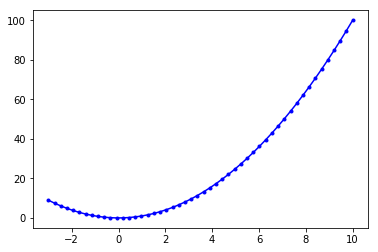

In [2]:
# Daten erzeugen
x = np.linspace(-3, 10, 50)
y = x**2

# Daten plotten (blau, durchgezogene Linie, und Punktmarkierung)
plt.plot(x, y, "b.-")

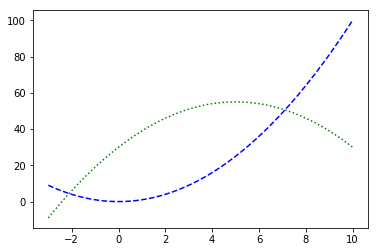

In [3]:
# Weitere Daten ins gleiche Diagramm plotten

# Neue daten Erzeugen
y2 = 10*x - x**2  + 30

# mit gepunkteten und gestrichtelten Linien
plt.plot(x, y, "b--")
plt.plot(x, y2, "g:")

In [4]:

# Bisher war das Plot-Ergebnis eingebettet.
# Man kann es aber auch interaktiv anzeigen (gut für Zoom etc)
%matplotlib qt
plt.plot(x, y, "r-")
plt.plot(x, y2, "c-")
plt.grid(1)

# Numerisches Rechnen (lineare Algebra)

Hier wird das Modul `numpy` benuzt. Siehe oben: `import numpy as np`.

In [5]:
# Definieren eines 2d-Arrays (3x3-Matrix)
M = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9.]]) ##:


# Elementweise Rechnungen

M1 = M * -10 ##:
M2 = M + 20 ##:
M3 = M**2 ##:


# Determinante

det_M = np.linalg.det(M) ##:

M := array([[1., 2., 3.],
            [4., 5., 6.],
            [7., 8., 9.]])

---


M1 := array([[-10., -20., -30.],
             [-40., -50., -60.],
             [-70., -80., -90.]])

---


M2 := array([[21., 22., 23.],
             [24., 25., 26.],
             [27., 28., 29.]])

---


M3 := array([[ 1.,  4.,  9.],
             [16., 25., 36.],
             [49., 64., 81.]])

---


---


In [6]:
# Ein bestimmtes Element adressieren (Index-Zählung beginnt bei 0)

M[0, 0] ##:
M[1, 2] ##:

# bestimmtes Element verändern:

M[1, 2] = -5

M ##:

___


___


M  := array([[ 1.,  2.,  3.],
             [ 4.,  5., -5.],
             [ 7.,  8.,  9.]])

___


In [7]:
# Mehrere Elemente adressieren ("indizieren")

# oberen zwei Elemente der "ersten Spalete" (Index: 0)
M[0:2, 0:1] ##:


# erste Spalte (Index 0) mit -1 multiplizieren
M[:, 0]*=0.1

M ##:

# Matrix transponieren

Q = M.T ##:


M[0:2, 0:1]  := array([[1.],
                       [4.]])

___


M  := array([[ 0.1,  2. ,  3. ],
             [ 0.4,  5. , -5. ],
             [ 0.7,  8. ,  9. ]])

___


Q := array([[ 0.1,  0.4,  0.7],
            [ 2. ,  5. ,  8. ],
            [ 3. , -5. ,  9. ]])

---


In [8]:
# Eigenwerte und Eigenvektoren bestimmen

np.set_printoptions(linewidth=270, precision=8)
eigvals, eigvects = np.linalg.eig(M)

eigvals ##:
eigvects ##:

eigvals  := array([-0.07800865+0.j        ,  7.08900432+5.86106005j,  7.08900432-5.86106005j])

___


eigvects  := array([[ 0.99657905+0.j        , -0.23770953+0.03821822j, -0.23770953-0.03821822j],
                    [-0.08254304+0.j        ,  0.20329509-0.56306126j,  0.20329509+0.56306126j],
                    [-0.00410453+0.j        , -0.7639808 +0.j        , -0.7639808 -0.j        ]])

___


**Beobachtung**: Es resultieren 1 reeller Eigenwert und zwei komplexe (d.h. ein konjugiert komplexes Paar).

Nebenbemerkung zu komplexen Zahlen: Die "imaginäre Einheit" $i$ bzw. in der Elektrotechnik meist $j$ ist definiert über die Gleichung

$$
j^2 = j\cdot j= -1.
$$

Eine komplexe Zahl $z$ ist die Summe $z = a + b \cdot j$ mit $a, b \in \mathbb{R}$ (reelle Zahlen). In Python schreibt man z.B. `z = -4 + 3j`.

In [9]:
# 1. Wert
w0 = eigvals[0] ##

# 1. Spalte (-> wird ein 1d-array)
v0 = eigvects[:, 0] ##:

(-0.0780086451878039+0j)

---


v0 := array([ 0.99657905+0.j, -0.08254304+0.j, -0.00410453+0.j])

---


In [10]:
# Matrix-Vektor-Multiplikation:

M@v0 ##:

# Alternative Notation (rückwärtskompatibel)

np.dot(M, v0) ##:


M@v0  := array([-0.07774178+0.j,  0.00643907+0.j,  0.00032019+0.j])

___


np.dot(M, v0)  := array([-0.07774178+0.j,  0.00643907+0.j,  0.00032019+0.j])

___


In [11]:
# Prüfen ob w0 bzw. v0 wirklich Eigenwert bzw. Eigenvektor ist von M ist

w0*v0 ##:

# Es kommt das gleiche Ergebnis wie oben raus (bis auf "numerisches Rauschen"):
diff = w0*v0 - M@v0 ##:


w0*v0  := array([-0.07774178+0.j,  0.00643907-0.j,  0.00032019-0.j])

___


diff := array([2.77555756e-17+0.j, 1.95156391e-16-0.j, 1.92445886e-16-0.j])

---


In [12]:
# Aufspalten in Real- und Imaginärteil

eigvals ##:

np.real(eigvals) ##:
np.imag(eigvals) ##:

eigvals  := array([-0.07800865+0.j        ,  7.08900432+5.86106005j,  7.08900432-5.86106005j])

___


np.real(eigvals)  := array([-0.07800865,  7.08900432,  7.08900432])

___


np.imag(eigvals)  := array([ 0.        ,  5.86106005, -5.86106005])

___


# Symbolisches Rechnen

Hier wird das Modul `sympy` benuzt. Siehe oben: `import sympy as sp`.

In [13]:
x1, x2 = sp.symbols("x1, x2")

f = x1**3 - 7*x1**2 + 2*x1 + 4 ##:

---


In [14]:
# 1. Ableitung

f.diff(x1)

In [15]:
# 2. Ableitung
f.diff(x1, 2) ##:

# ... ausmultipliziert:
f.diff(x1, 2).expand() ##:

___


___
